This Airbnb data was downloaded from Maven Analytics

*https://app.mavenanalytics.io/datasets?page=4*

`License
CC0: Public Domain`

## Scope of Work

- Can you spot any major differences in the Airbnb market between cities?

- Which attributes have the biggest influence in price?

- Are you able to identify any trends or seasonality in the review data?

- Which city offers a better value for travel?

## Discovery of data 

In [1]:
# Importing libraries 
from ipywidgets  import interact
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [2]:
# Getting files from the local drive on the computer 

listings = pd.read_csv('C:/Users/H156405/Downloads/new data sets/Airbnb+Data/Airbnb Data/Listings.csv')
reviews = pd.read_csv(r'C:\Users\H156405\Downloads\new data sets\Airbnb+Data\Airbnb Data\Reviews.csv')

In [3]:
listings.head()

,listing_id,name,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,...,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
0,281420,"Beautiful Flat in le Village Montmartre, Paris",1466919,2011-12-03,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
1,3705183,39 mÂ² Paris (Sacre CÅ“ur),10328771,2013-11-29,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
2,4082273,"Lovely apartment with Terrace, 60m2",19252768,2014-07-31,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
3,4797344,Cosy studio (close to Eiffel tower),10668311,2013-12-17,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
4,4823489,Close to Eiffel Tower - Beautiful flat : 2 rooms,24837558,2014-12-14,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f


In [4]:
reviews.head()

,listing_id,review_id,date,reviewer_id
0,11798,330265172,2018-09-30,11863072
1,15383,330103585,2018-09-30,39147453
2,16455,329985788,2018-09-30,1125378
3,17919,330016899,2018-09-30,172717984
4,26827,329995638,2018-09-30,17542859


In [5]:
# Dropping some columns 
listings.drop(columns = ['listing_id','host_id','host_response_rate','host_acceptance_rate'] , inplace =True)

In [6]:
# Drop duplicates
listings.drop_duplicates()

,name,host_since,host_location,host_response_time,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood,district,...,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
0,"Beautiful Flat in le Village Montmartre, Paris",2011-12-03,"Paris, Ile-de-France, France",NaN,f,1.0,t,f,Buttes-Montmartre,NaN,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
1,39 mÂ² Paris (Sacre CÅ“ur),2013-11-29,"Paris, Ile-de-France, France",NaN,f,1.0,t,t,Buttes-Montmartre,NaN,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
2,"Lovely apartment with Terrace, 60m2",2014-07-31,"Paris, Ile-de-France, France",NaN,f,1.0,t,f,Elysee,NaN,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
3,Cosy studio (close to Eiffel tower),2013-12-17,"Paris, Ile-de-France, France",NaN,f,1.0,t,t,Vaugirard,NaN,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
4,Close to Eiffel Tower - Beautiful flat : 2 rooms,2014-12-14,"Paris, Ile-de-France, France",NaN,f,1.0,t,f,Passy,NaN,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279707,Appartement T2 neuf prÃ¨s du tram T3a Porte Didot,2015-04-13,"Paris, Ile-de-France, France",NaN,f,1.0,t,t,Observatoire,NaN,...,1,7,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
279708,Cozy Studio in Montmartre,2013-11-27,"Paris, Ile-de-France, France",NaN,f,1.0,t,t,Buttes-Montmartre,NaN,...,7,15,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
279709,Nice and cosy mini-appartement in Paris,2012-04-27,"Paris, Ile-de-France, France",NaN,f,1.0,t,t,Buttes-Montmartre,NaN,...,6,30,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
279710,Charming apartment near Rue Saint Maur / Oberk...,2015-07-16,"Paris, Ile-de-France, France",NaN,f,1.0,t,t,Popincourt,NaN,...,3,18,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f


In [7]:
# Creating an interactive function for displaying the dataframe by city chosen
@interact
def filter_city(city=list(listings.city.unique())):
    return listings[listings.city == city].head()

interactive(children=(Dropdown(description='city', options=('Paris', 'New York', 'Bangkok', 'Rio de Janeiro', …

In [8]:
# creating an interactive function to diplay the data for a certain rating value
@interact
def filter_rating(rating = (0,10,0.5)):
    return listings[listings.review_scores_rating>rating].head()

interactive(children=(FloatSlider(value=5.0, description='rating', max=10.0, step=0.5), Output()), _dom_classe…

### Checking Host based location and city where listing in 

In [9]:
listings['location'] = listings['host_location'].apply(lambda x : str(x).split(',')[0] )

In [10]:
test = listings['location'] == listings['city']

In [11]:
test.value_counts()

True     172476
False    107236
dtype: int64

In [12]:
listings[listings['location'] != listings['city']][['host_location' , 'name','city']]

,host_location,name,city
9220,"Paris, Ile-de-France, France",Cute 1 BR in the Lower East Side,New York
9221,"Paris, Ile-de-France, France",Lovely Apartment in Harlem West,New York
9222,"Paris, Ile-de-France, France",Appartement en duplex de 3 chambres,New York
9223,"Paris, Ile-de-France, France",NaN,New York
9224,"Paris, Ile-de-France, France",Amazing Studio-EmpireStateBuilding,New York
...,...,...,...
273177,"Paris, Ile-de-France, France",Entire Luxury Apartment Town Hall Sydney CBD,Sydney
273178,"Paris, Ile-de-France, France",Cosy Studio â›± 5 min walk to the Sea,Sydney
273179,"Paris, Ile-de-France, France","Apartment in Montmartre, Paris",Istanbul
273180,"Paris, Ile-de-France, France",Malua Cihangir Istanbul,Istanbul


it appears that some hosts own houses out of their location

### Data and Feature investigation

In [13]:
listings.shape

(279712, 30)

The data set has 279712 records and 30 columns or features

In [14]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279712 entries, 0 to 279711
Data columns (total 30 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   name                         279539 non-null  object 
 1   host_since                   279547 non-null  object 
 2   host_location                278872 non-null  object 
 3   host_response_time           150930 non-null  object 
 4   host_is_superhost            279547 non-null  object 
 5   host_total_listings_count    279547 non-null  float64
 6   host_has_profile_pic         279547 non-null  object 
 7   host_identity_verified       279547 non-null  object 
 8   neighbourhood                279712 non-null  object 
 9   district                     37012 non-null   object 
 10  city                         279712 non-null  object 
 11  latitude                     279712 non-null  float64
 12  longitude                    279712 non-null  float64
 13 

In [15]:
listings.dtypes.value_counts()

object     15
float64    11
int64       4
dtype: int64

We have 15 columns of object type , 13 columns of float64 type and 4 columns of int64 type. Some Columns will be converted to proper type for instance `host_since`  

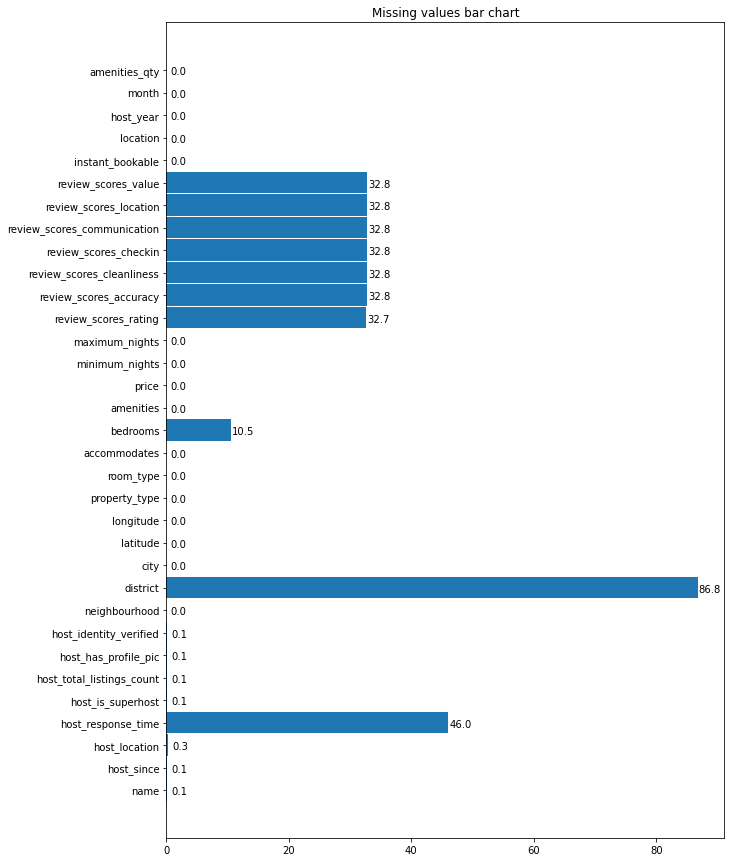

In [53]:
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        width = rect.get_width()
        height = rect.get_height()
        ax.annotate('{}'.format(round(width,1)),
                    xy=(rect.get_x() + rect.get_width() + 2, rect.get_y()+rect.get_height()/5 ),
                    ha='center', va='bottom')
        
missing_values = (listings.isna().sum()/ listings.shape[0])*100
columns = missing_values.index
fig , ax = plt.subplots(figsize=(10,15))
rect = ax.barh(y=missing_values.index , width = missing_values.values , height = 0.95 , label=columns   )
ax.set_title('Missing values bar chart')
autolabel(rect)
plt.show()

We can observe that some features miss values , for instance the reviews ratings.

In [17]:
#creating the list of cities 
cities = listings['city'].unique()

In [18]:
"""
converting 'host-since' from object type to datetime
and creating a new feature as host_year

"""
listings['host_since'] =  pd.to_datetime(listings['host_since'])
listings['host_year'] = listings['host_since'].transform(lambda x:str(x).split('-')[0])



## Host engaging in Airbnb

We are assessing the number hosts joined Airbnb over the years and the average price by city

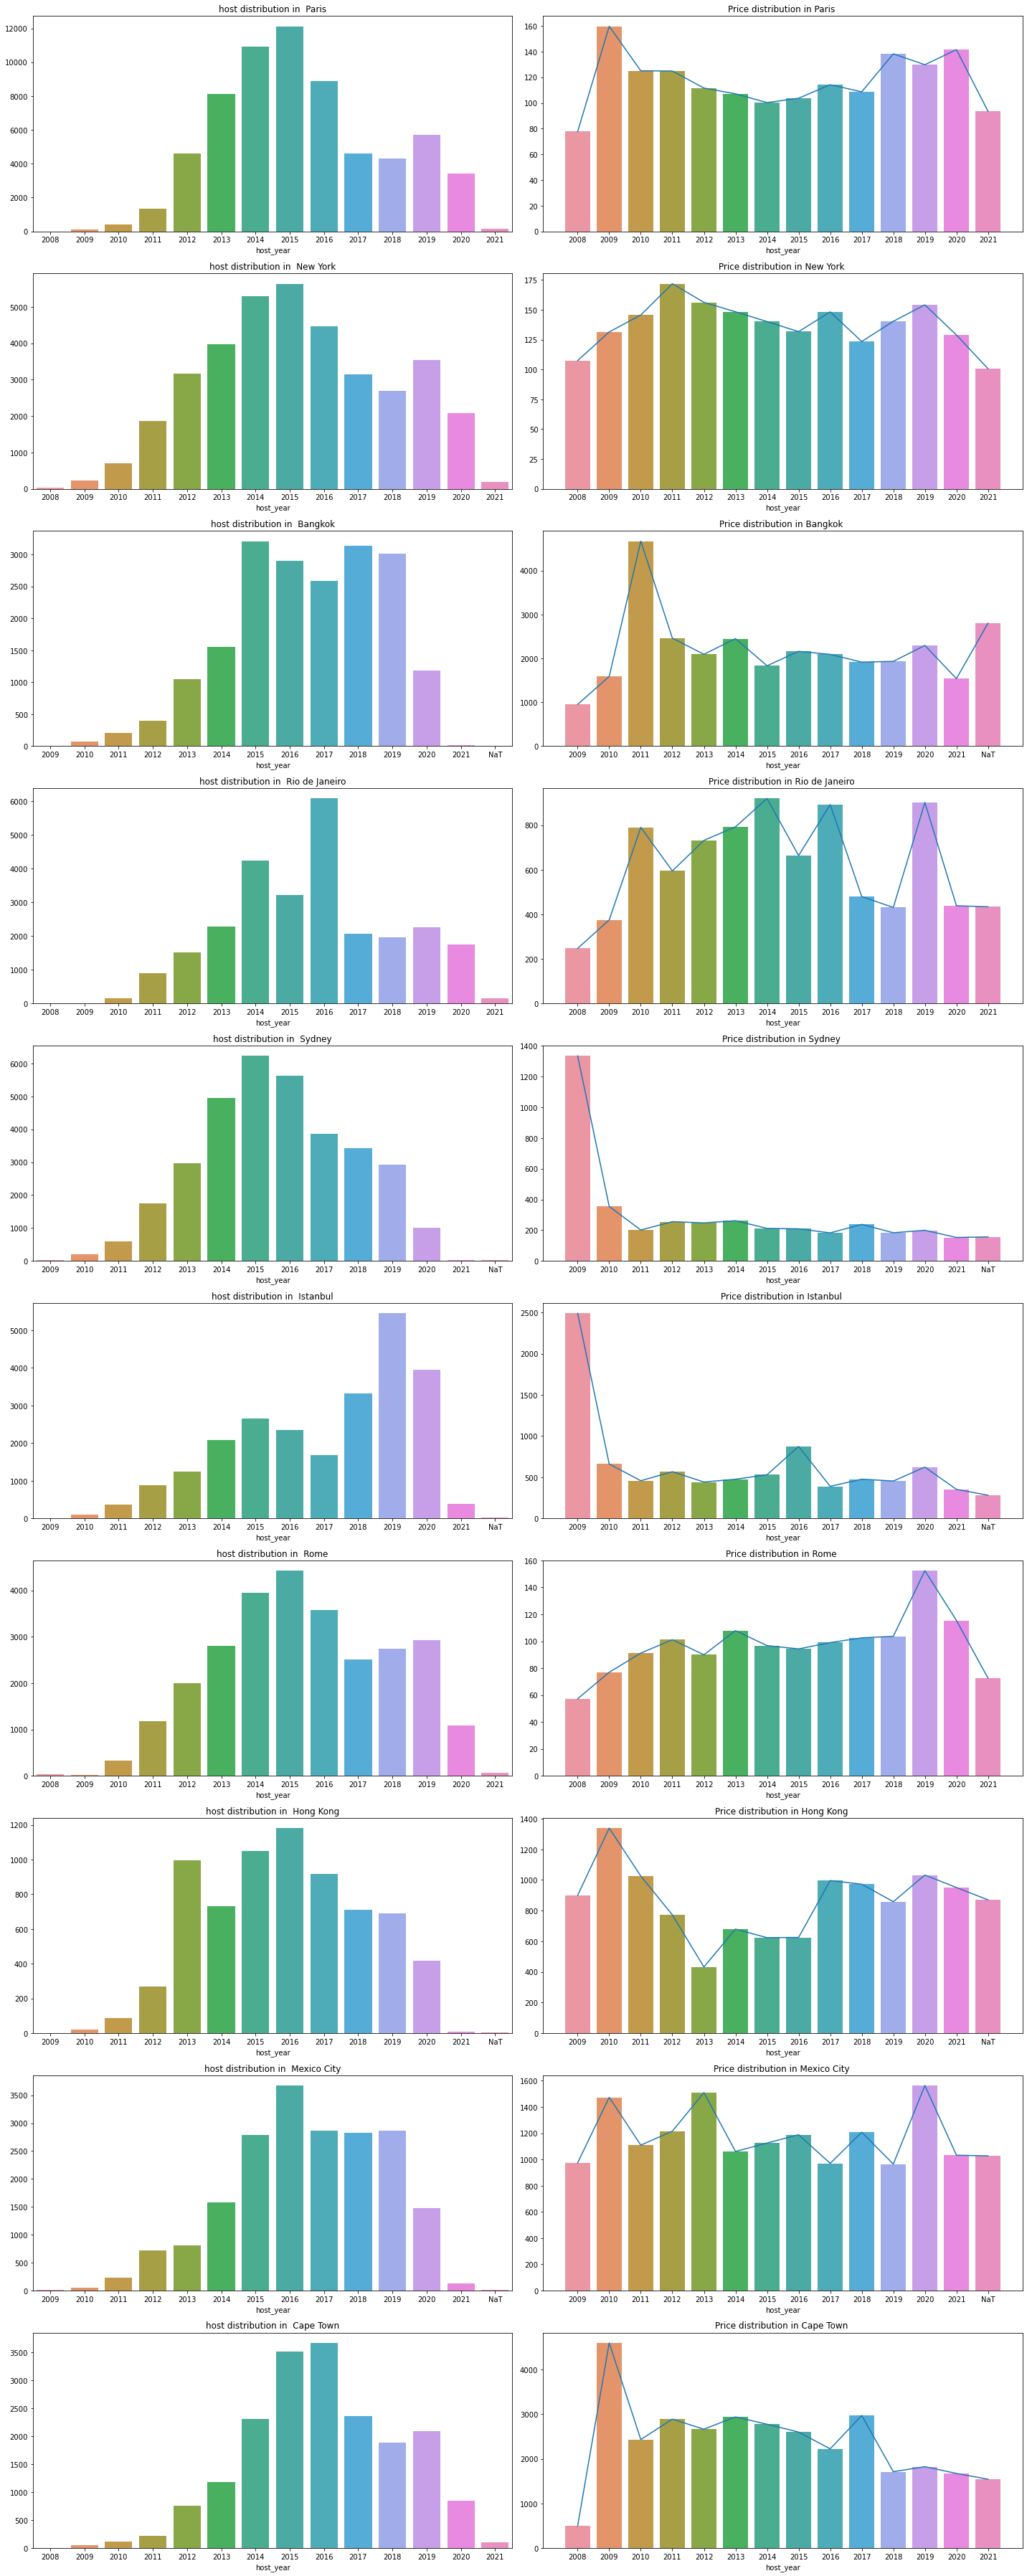

In [20]:
fig, axs = plt.subplots(len(cities),2,figsize=(20,50) , tight_layout = True) 
for n in range(0,len(cities),1):
    data = listings[listings['city']== cities[n]].groupby('host_year')['name'].count()
    sns.barplot(x=data.index[0:14] , y= data.values[0:14], ax=axs[n,0])
    axs[n,0].set_title(f'host distribution in  {cities[n]}')
    data1 = listings[listings.city==cities[n]].groupby('host_year').mean()['price']
    sns.barplot(x= data1.index[0:14], y=data1.values[0:14], data=listings  , ax = axs[n,1])
    sns.lineplot(x= data1.index[0:14], y=data1.values[0:14], data=data1  , ax = axs[n,1])
    axs[n,1].set_title(f'Price distribution in {cities[n]} ')

There has been a significant increase of host joining airbnb from 2012 in all cities then we drop from 2019 , certainly due to recent the covid pandemic. As of the price , it has know a high start at the beginning of the project in 2008 and 2009 then a certain monotony over the next year across the majority of cities.

## Host Response Time Analysis

In [21]:
listings[listings['host_response_time'].isna()!=True]

,name,host_since,host_location,host_response_time,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood,district,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,location,host_year
26175,Appartement lumineux rue de Levis,2014-02-25,"Clermont, Hauts-de-France, France",within a few hours,f,1.0,t,t,Batignolles-Monceau,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,t,Clermont,2014
26176,Appartement Paris 19 - Balcon et vue sur Paris,2012-11-30,"Nantes, Pays de la Loire, France",within a day,f,1.0,t,t,Buttes-Chaumont,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,Nantes,2012
26177,Paris 15,2017-11-17,LB,within a day,f,1.0,t,f,Vaugirard,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,LB,2017
26178,Bright and Charming Flat for 2 in Great Location,2020-03-11,MY,within an hour,f,1.0,t,t,Reuilly,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,t,MY,2020
26179,Amazing apartment - 4P/1BR - Canal Saint Martin,2020-04-21,FR,within a few hours,f,1.0,t,f,Enclos-St-Laurent,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,t,FR,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271181,Charming duplex near JARDIN DU LUXEMBOURG,2020-07-17,"Paris, Ile-de-France, France",within an hour,f,1.0,t,f,Pantheon,NaN,...,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f,Paris,2020
271182,Appartement piscine place d'Italie,2012-10-18,"Paris, Ile-de-France, France",within a few hours,f,1.0,t,t,Gobelins,NaN,...,100.0,10.0,10.0,10.0,10.0,10.0,10.0,t,Paris,2012
271183,Cozy Montmartre flat near Le Moulin Rouge,2016-05-25,"Paris, Ile-de-France, France",within a day,f,1.0,t,t,Buttes-Montmartre,NaN,...,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f,Paris,2016
271184,Moderne-ancien- jungle urbaine - proche Montma...,2012-05-26,"Paris, Ile-de-France, France",within an hour,f,1.0,t,t,Buttes-Montmartre,NaN,...,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f,Paris,2012


Text(0.5, -0.1, 'Host response time')

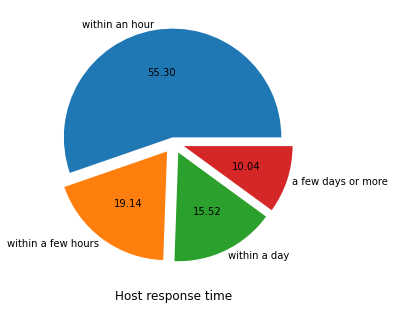

In [22]:
plt.figure(figsize=(5, 5))
plt.pie(listings['host_response_time'].value_counts(),explode= [0.05,0.1,0.1,0.1],labels=listings['host_response_time'].value_counts().index ,autopct ='%.2f', rotatelabels =False , labeldistance =1.05)
plt.title('Host response time',loc = 'center',y =-0.1)


 More than 55% of host responded within an hour , which is quite interesting despite the fact only 46 % didn't respond.

let's check the respond rate by city 

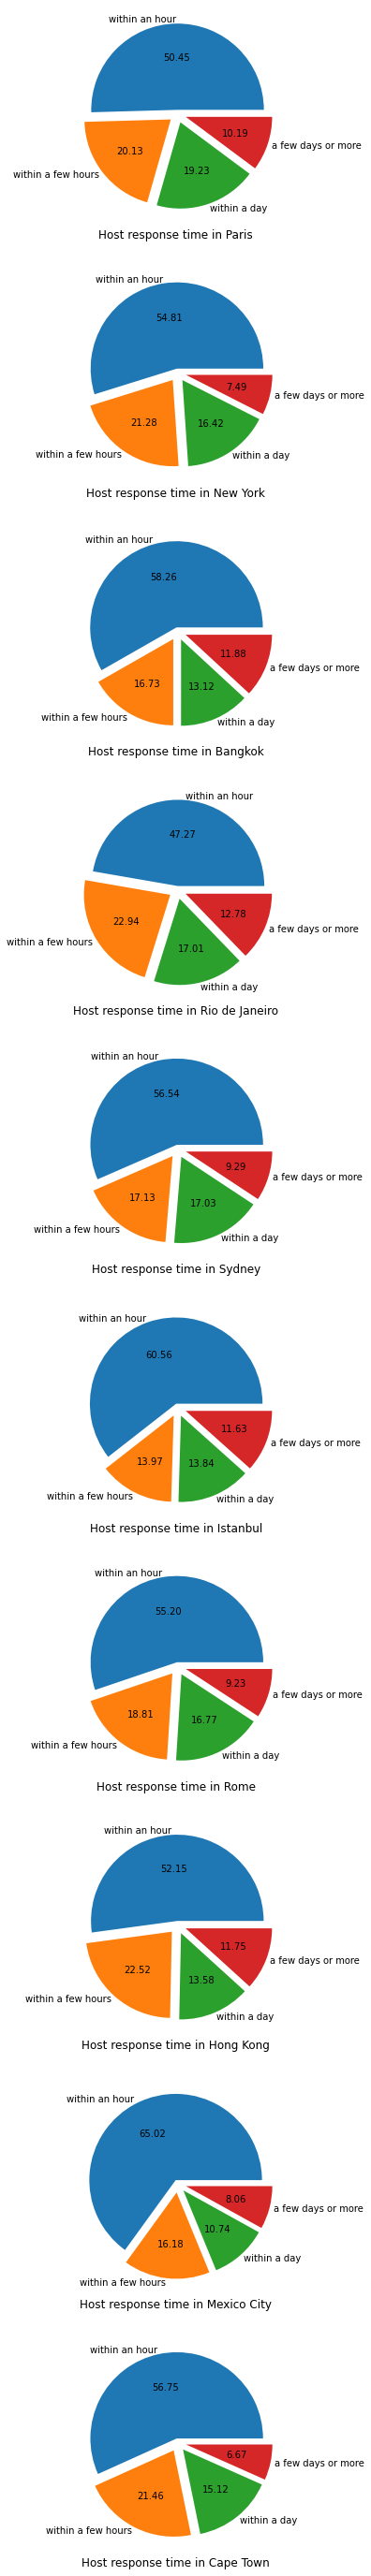

In [23]:
fig, axs = plt.subplots(len(cities),figsize=(10,50) ) 
for n in range(0,len(cities),1):
    axs[n].pie(listings[listings['city']== cities[n]]['host_response_time'].value_counts(),explode= [0.05,0.1,0.1,0.1],labels=listings['host_response_time'].value_counts().index ,autopct ='%.2f', rotatelabels =False , labeldistance =1.05)
    axs[n].set_title(f'Host response time in {cities[n]} ',loc = 'center',y =-0.1)


The finding is the same , in most cities around 50% of host tend to respond within an hour which is quite good for any guest interested in any listing.

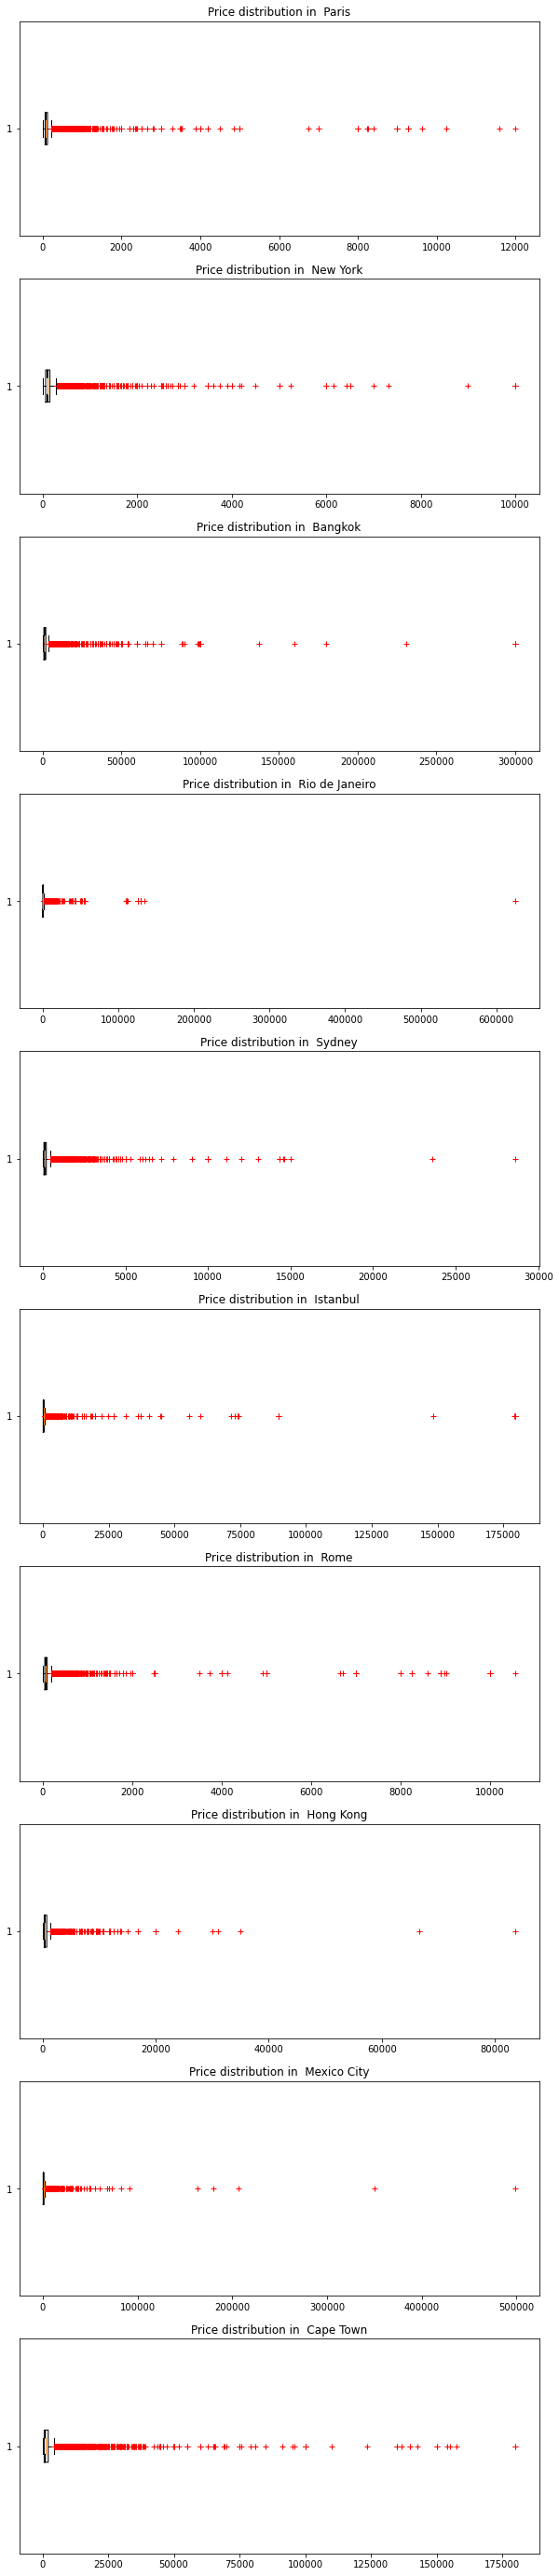

In [26]:
color = {
      "boxes": "DarkGreen",
      "whiskers": "DarkOrange",
      "medians": "DarkBlue",
      "caps": "Gray" }
fig, axs = plt.subplots(len(cities),figsize=(10,50) ) 
for n in range(0,len(cities),1):
    axs[n].boxplot(listings[listings['city']== cities[n]]['price'],color,vert=False, sym='r+')
    axs[n].set_title(f'Price distribution in  {cities[n]}')



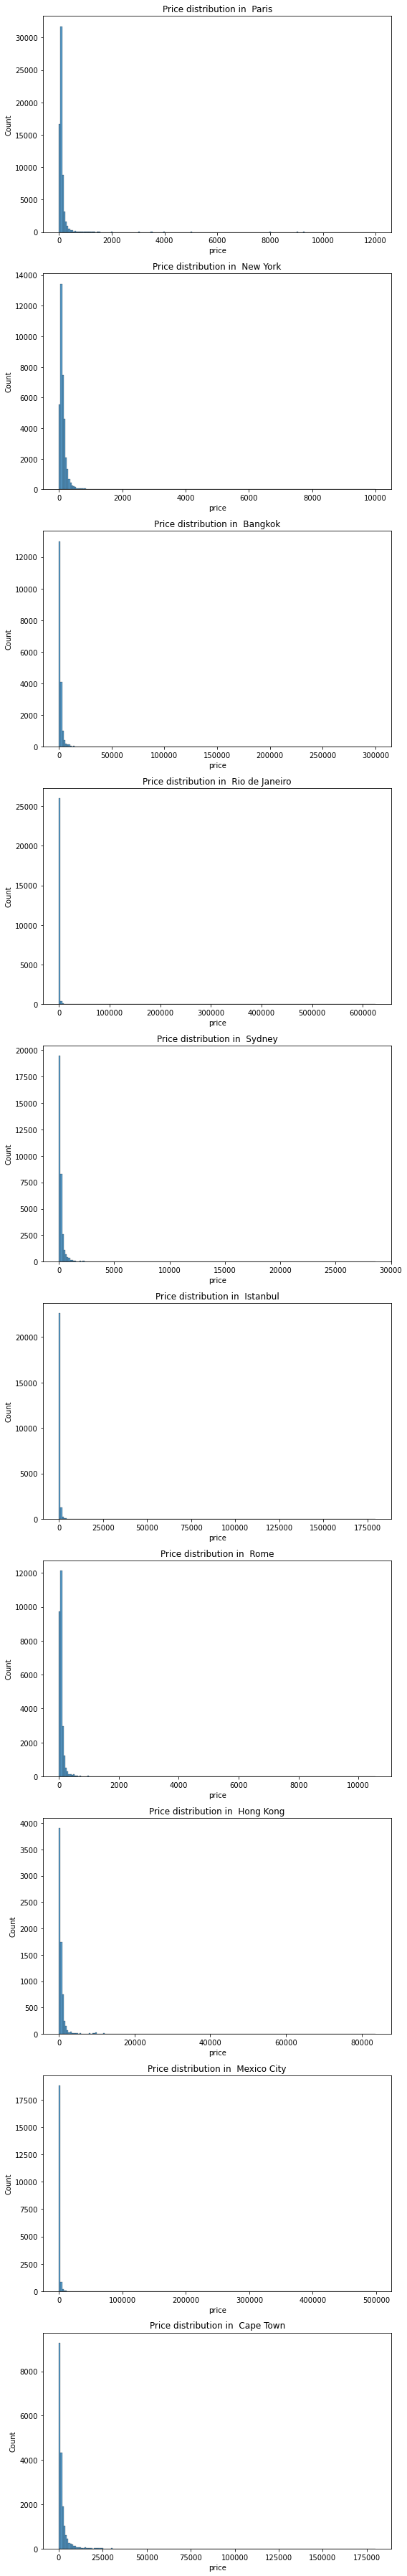

In [57]:
fig, axs = plt.subplots(len(cities),figsize=(8,50) ,tight_layout= True) 
for n in range(0,len(cities),1):
    sns.histplot(listings[listings['city']== cities[n]]['price'],bins =200,ax = axs[n])
    axs[n].set_title(f'Price distribution in  {cities[n]}')

We can observe a lot of prices out of the box seems to be outliers , we will deepen the investigation to understand more the causes of this distribution.

In [27]:
#fig, axs = plt.subplots(len(cities),2,figsize=(20,75) ) 
#for n in range(0,len(cities),1):
    #axs[n,0].scatter(listings[listings['city']== cities[n]]['maximum_nights'],listings[listings['city']== cities[n]]['price'] ,marker ='|', color='r',label ="maximum nights")
    #axs[n,0].scatter(listings[listings['city']== cities[n]]['minimum_nights'],listings[listings['city']== cities[n]]['price'],marker = '_',color='g' , label ="minimum nights")
    #axs[n,0].set_ylabel('Price')
    #axs[n,0].set_xlabel('night stays' ,loc = 'left' )
    #axs[n,0].set_title(f'Price against night stays in  {cities[n]}')
    #axs[n,0].legend()
    #axs[n,1].scatter(listings[listings['city']== cities[n]]['bedrooms'],listings[listings['city']== cities[n]]['price'], label='bedrooms')
    #axs[n,1].set_ylabel('Price')
    #axs[n,1].set_xlabel('bedrooms' ,loc = 'right' )
    #axs[n,1].set_title(f'Price against number of bedrooms in  {cities[n]}')

We can observe that the price distribution isn't reflextive of the number of bedrooms nor the number of night stays in all the cities.

### Is host superhost ?

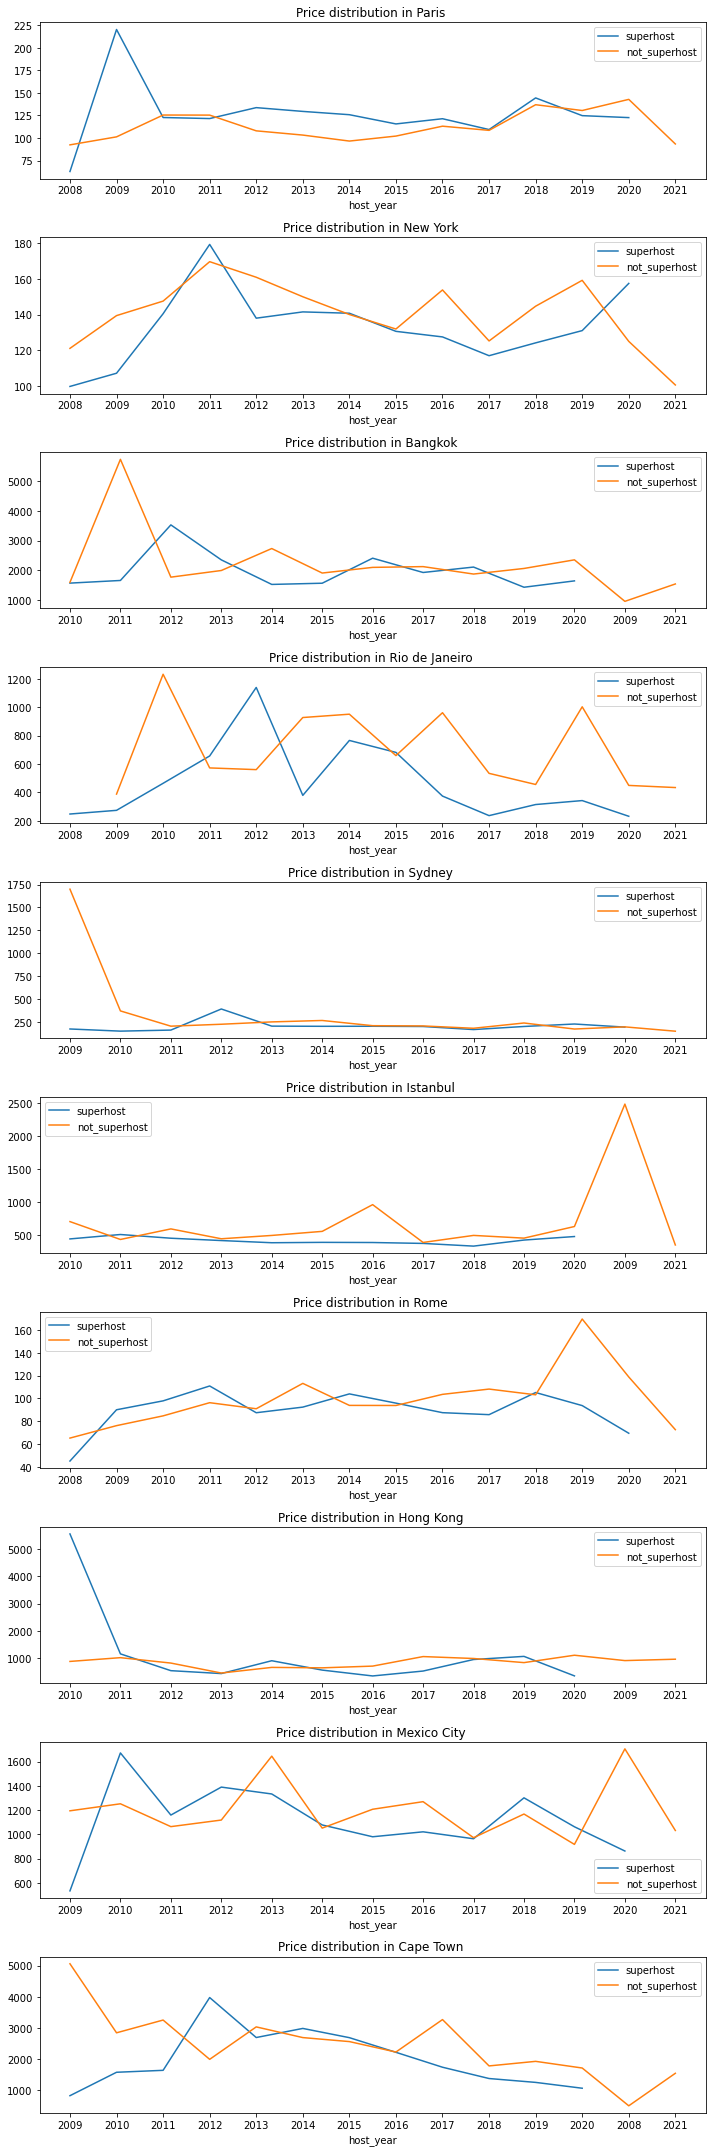

In [55]:
fig , axs = plt.subplots(len(cities), figsize = (10, 30) , sharex=False , tight_layout = True)
for n in range(0,len(cities),1):
    superhost = listings[(listings.city==cities[n]) & (listings['host_is_superhost']=='Yes')].groupby('host_year').mean()['price']
    not_superhost = listings[(listings.city==cities[n]) & (listings['host_is_superhost']=='No')].groupby('host_year').mean()['price']
    sns.lineplot(superhost.index[0:14] , superhost.values[0:14] , data=superhost, ax = axs[n],label='superhost')
    sns.lineplot(not_superhost.index[0:14] , not_superhost.values[0:14] , data=not_superhost, ax = axs[n],label='not_superhost')
    axs[n].set_title(f'Price distribution in {cities[n]} ')

In [29]:
"""
@ interact

def plot_chart(city=listings.city):
    filter_df = listings[listings==city]
    fig , axs = plt.subplots(figsize = (10, 30) , sharex=False , tight_layout = True)
    superhost = filter_df[filter_df['host_is_superhost']=='Yes'].groupby('host_year').mean()['price']
    not_superhost = filter_df[filter_df['host_is_superhost']=='No'].groupby('host_year').mean()['price']
    sns.lineplot(superhost.index[0:14] , superhost.values[0:14] , data=superhost, ax = axs,label='superhost')
    sns.lineplot(not_superhost.index[0:14] , not_superhost.values[0:14] , data=not_superhost, ax = axs,label='not_superhost')
    axs[n].set_title(f'Price distribution in {city} ')
"""

"\n@ interact\n\ndef plot_chart(city=listings.city):\n    filter_df = listings[listings==city]\n    fig , axs = plt.subplots(figsize = (10, 30) , sharex=False , tight_layout = True)\n    superhost = filter_df[filter_df['host_is_superhost']=='Yes'].groupby('host_year').mean()['price']\n    not_superhost = filter_df[filter_df['host_is_superhost']=='No'].groupby('host_year').mean()['price']\n    sns.lineplot(superhost.index[0:14] , superhost.values[0:14] , data=superhost, ax = axs,label='superhost')\n    sns.lineplot(not_superhost.index[0:14] , not_superhost.values[0:14] , data=not_superhost, ax = axs,label='not_superhost')\n    axs[n].set_title(f'Price distribution in {city} ')\n"

In [30]:
listings['host_is_superhost'] = listings['host_is_superhost'].map({'f':'No','t':'Yes'})
listings['host_has_profile_pic'] = listings['host_has_profile_pic'].map({'f':'No','t':'Yes'})
listings['host_identity_verified'] = listings['host_identity_verified'].map({'f':'No','t':'Yes'})
listings['instant_bookable'] = listings['instant_bookable'].map({'f':'No','t':'Yes'})




In [31]:
object_columns = listings.select_dtypes('object').columns
num_columns = listings.dtypes[listings.dtypes!='object']


In [32]:
round(listings[listings['host_is_superhost']=='No']['host_is_superhost'].count()/listings.shape[0] ,2)*100

82.0

In [33]:
round(listings.groupby('city')['host_is_superhost'].value_counts() / listings.groupby('city')['host_is_superhost'].count() ,2)*100

city            host_is_superhost
Bangkok         No                   80.0
                Yes                  20.0
Cape Town       No                   76.0
                Yes                  24.0
Hong Kong       No                   82.0
                Yes                  18.0
Istanbul        No                   87.0
                Yes                  13.0
Mexico City     No                   68.0
                Yes                  32.0
New York        No                   81.0
                Yes                  19.0
Paris           No                   87.0
                Yes                  13.0
Rio de Janeiro  No                   83.0
                Yes                  17.0
Rome            No                   74.0
                Yes                  26.0
Sydney          No                   88.0
                Yes                  12.0
Name: host_is_superhost, dtype: float64

We can observe than 82% of host are not superhost.Also the number of superhosts is quite low in all cities less than 32% of hosts 

In [34]:
round(listings[listings['instant_bookable']=='No']['instant_bookable'].count()/listings.shape[0] ,2)*100

59.0

In [35]:
round(listings[listings['host_identity_verified']=='No']['host_identity_verified'].count()/listings.shape[0] ,3)*100

28.000000000000004

<AxesSubplot:xlabel='instant_bookable', ylabel='count'>

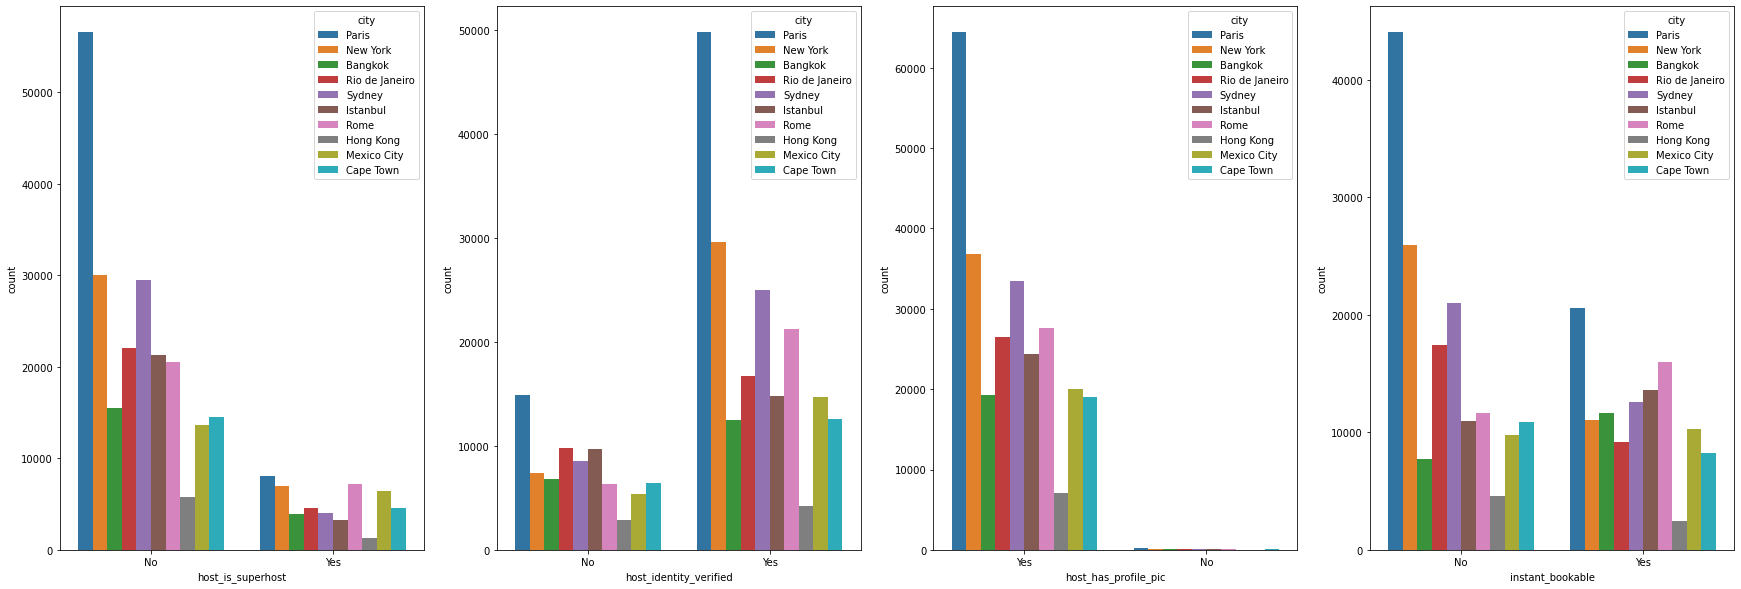

In [36]:
fig, axs = plt.subplots(1,4,figsize=(30,10) ) 
sns.countplot(x=listings['host_is_superhost'] , data= listings, hue ='city'  ,  ax=axs[0])
sns.countplot(x=listings['host_identity_verified'] ,data= listings, hue ='city'  , ax = axs[1])
sns.countplot(x=listings['host_has_profile_pic'] ,data= listings, hue ='city'  , ax = axs[2])
sns.countplot(x=listings['instant_bookable'] ,data= listings, hue ='city'  , ax = axs[3])


In [37]:
round(listings.groupby('city')['instant_bookable'].value_counts()/listings.groupby('city')['instant_bookable'].count() ,2)*100

city            instant_bookable
Bangkok         Yes                 60.0
                No                  40.0
Cape Town       No                  57.0
                Yes                 43.0
Hong Kong       No                  65.0
                Yes                 35.0
Istanbul        Yes                 55.0
                No                  45.0
Mexico City     Yes                 51.0
                No                  49.0
New York        No                  70.0
                Yes                 30.0
Paris           No                  68.0
                Yes                 32.0
Rio de Janeiro  No                  66.0
                Yes                 34.0
Rome            Yes                 58.0
                No                  42.0
Sydney          No                  62.0
                Yes                 38.0
Name: instant_bookable, dtype: float64

We can observe that around 40% to 70% of the of the host are not istant bookable with the highest New York city.
let's check if this has and influence on the price.

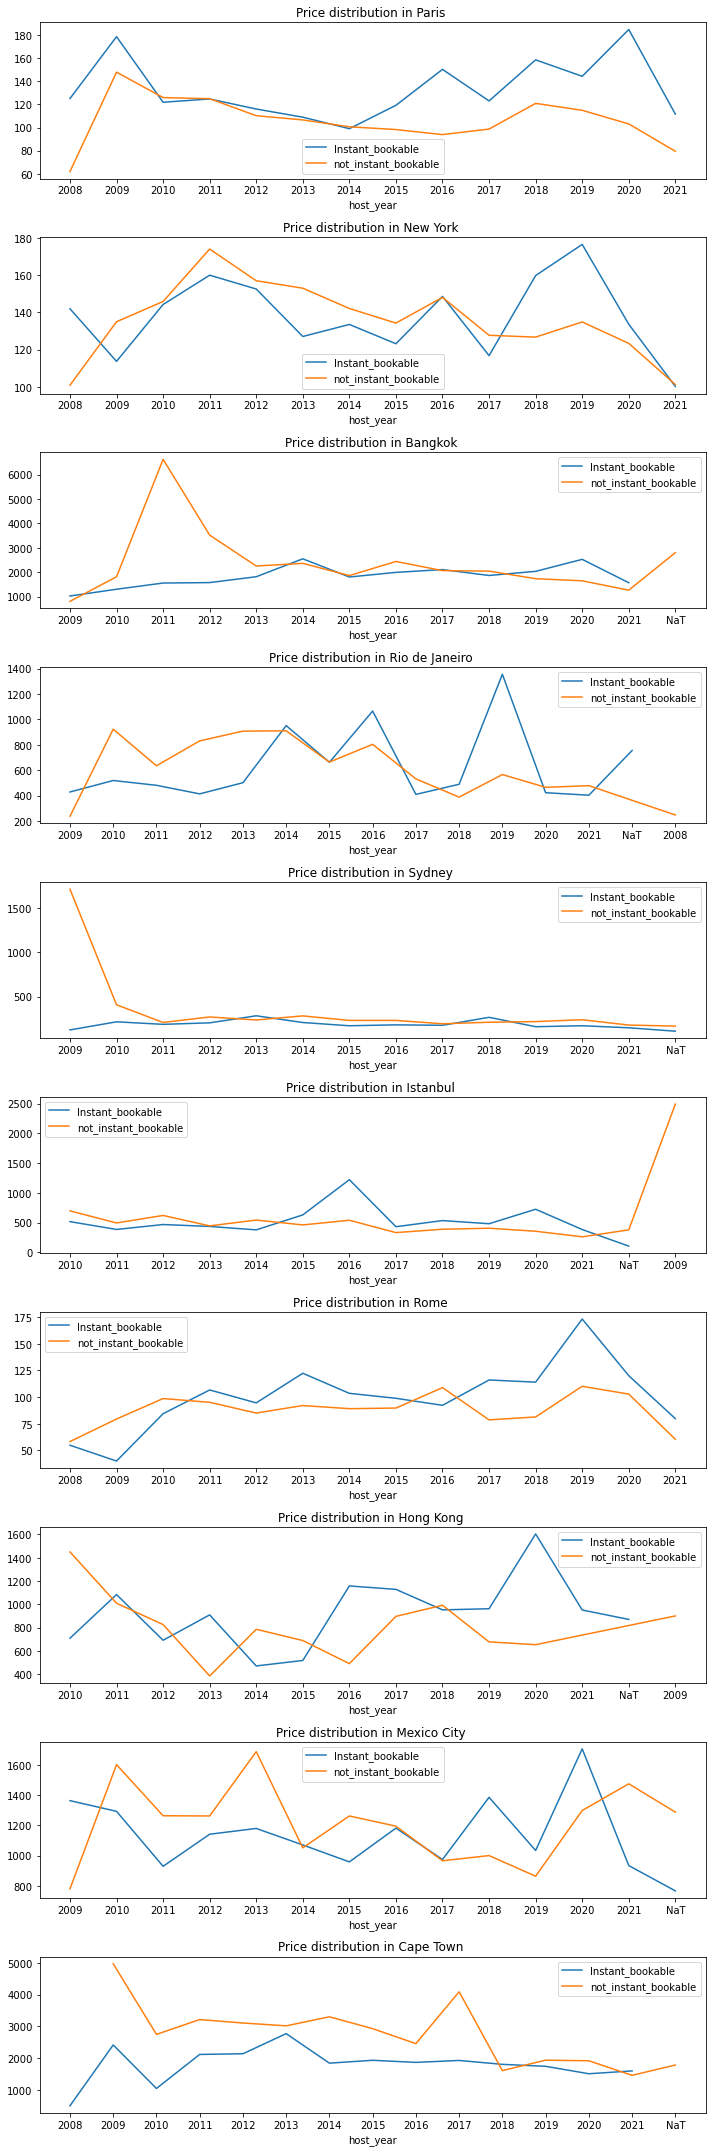

In [38]:
fig , axs = plt.subplots(len(cities), figsize = (10, 30) , sharex=False , tight_layout = True)
for n in range(0,len(cities),1):
    instant_bookable = listings[(listings.city==cities[n]) & (listings['instant_bookable']=='Yes')].groupby('host_year').mean()['price']
    not_instant_bookable = listings[(listings.city==cities[n]) & (listings['instant_bookable']=='No')].groupby('host_year').mean()['price']
    sns.lineplot(instant_bookable.index[0:14] , instant_bookable.values[0:14] , data=instant_bookable, ax = axs[n],label='Instant_bookable')
    sns.lineplot(not_instant_bookable.index[0:14] , not_instant_bookable.values[0:14] , data=not_instant_bookable, ax = axs[n],label='not_instant_bookable')
    axs[n].set_title(f'Price distribution in {cities[n]} ')
    


### Price versus room type analysis

<AxesSubplot:ylabel='room_type'>

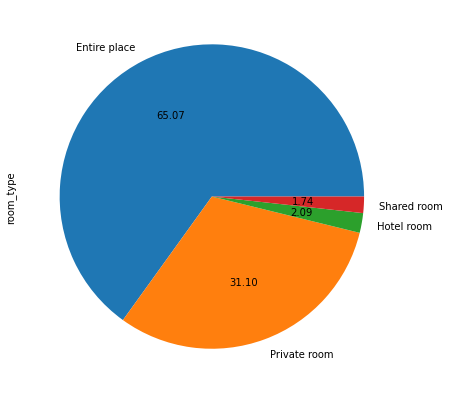

In [39]:
plt.figure(figsize=(7, 7))
listings['room_type'].value_counts().plot.pie(autopct ='%.2f')

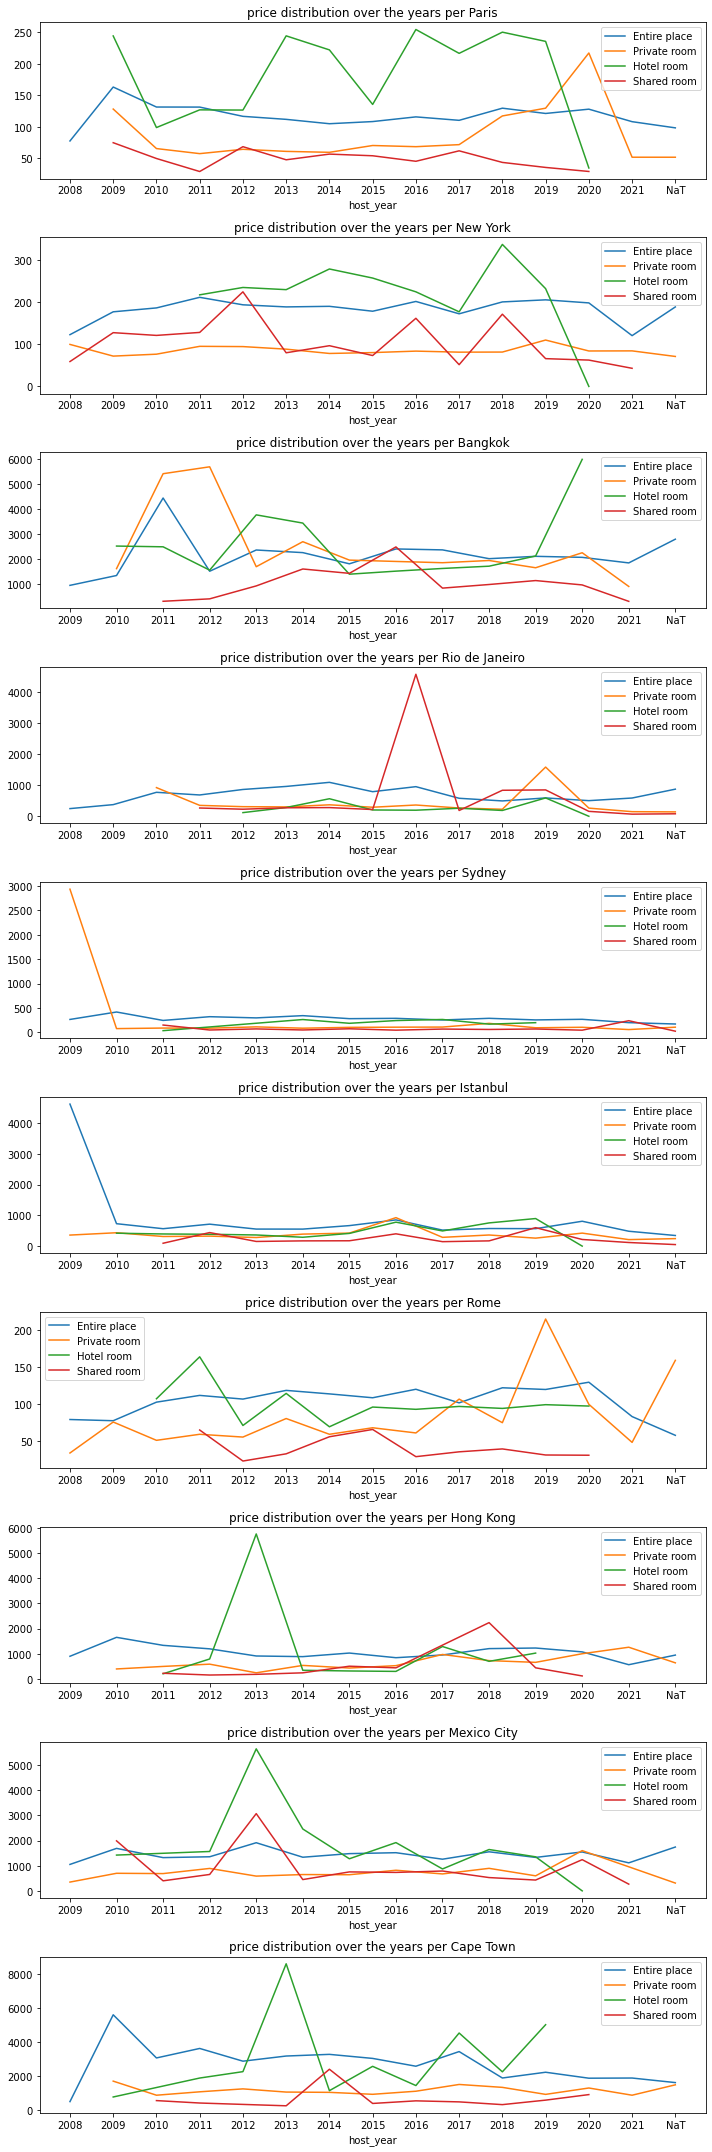

In [40]:
room_type = listings.room_type.unique()
fig , axs = plt.subplots(len(cities), figsize = (10, 30) , sharex=False , tight_layout = True)
for n in range(0,len(cities),1):
    for room in room_type:
        data3 = listings[(listings.city==cities[n]) & (listings.room_type==room)].groupby('host_year').mean() 
        sns.lineplot(x= data3.index , y = data3.price.values , data = data3, label= room , ax=axs[n])
    axs[n].set_title(f'price distribution over the years per {cities[n]}')

### Amenities analysis

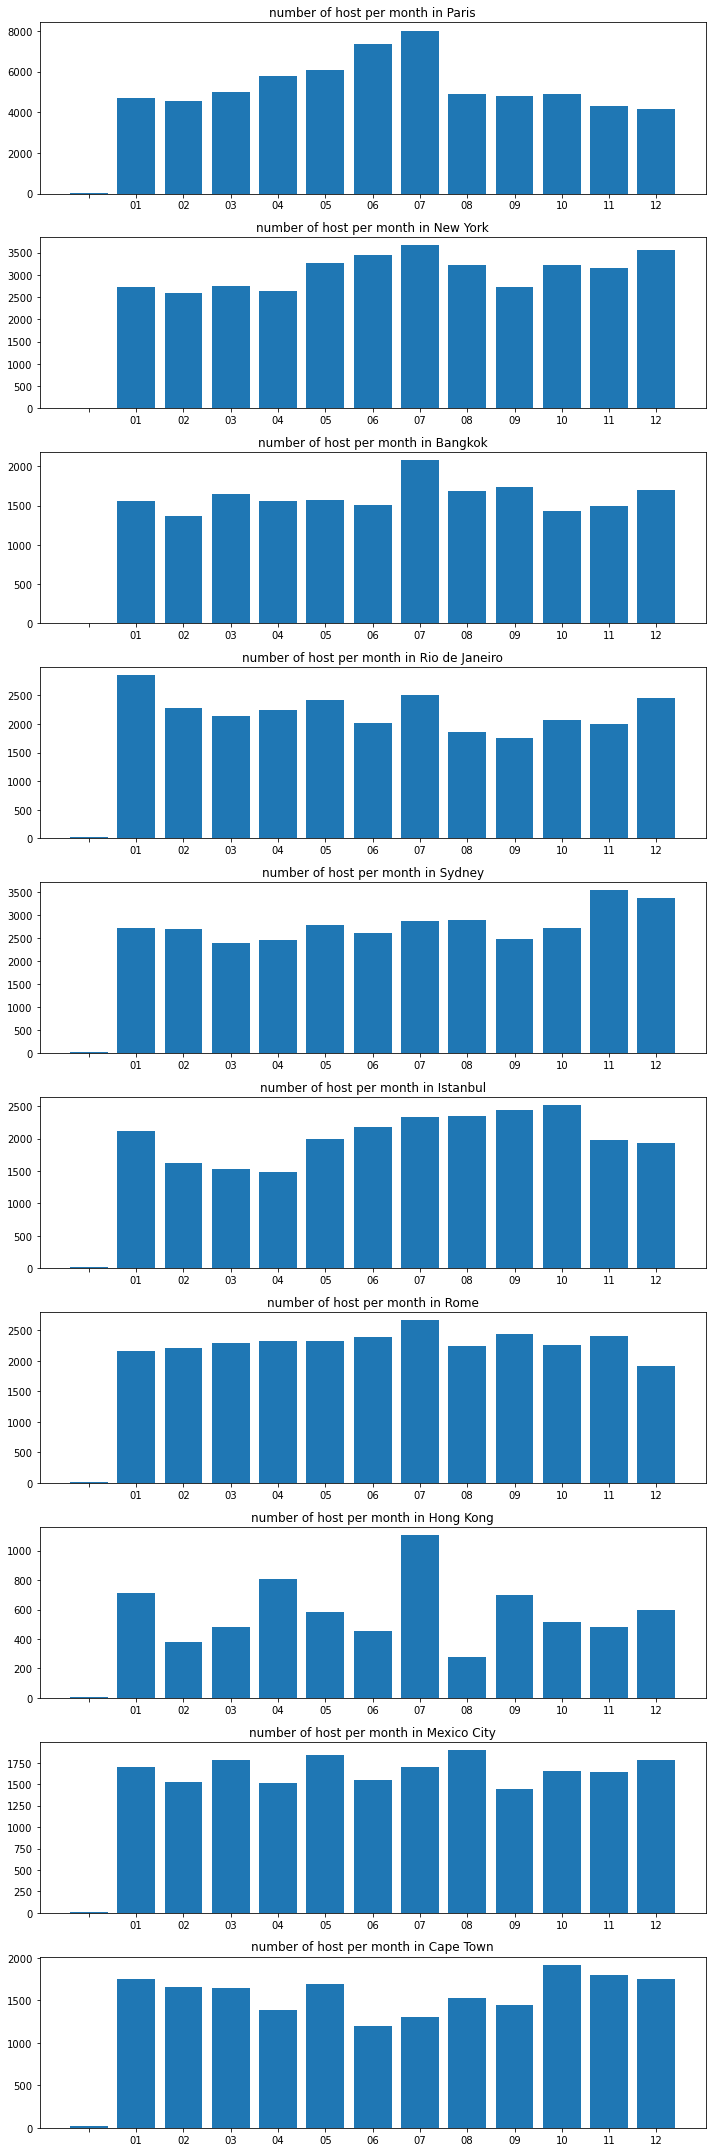

In [41]:
listings['month'] = listings['host_since'].apply(lambda x:str(x)[5:7])
listings.groupby('month', sort = True)['month'].count()
#listings['month']= listings['month'].map({'01':'January','02':'February','03':'March','04':'April','05':'May','06':'June','07':'July','08':'August','09':'September','10':'October','11':'November','12':'December'})
fig , axs = plt.subplots(len(cities), figsize = (10, 30) , sharex=False , tight_layout = True)
for n in range(0,len(cities),1):
    df = listings[listings.city==cities[n]].groupby('month').count()
    axs[n].bar(x=df.index,height =df.name.values)
    axs[n].set_title(f'number of host per month in {cities[n]}')

In [42]:
def clean_tool(text):
    text2 = text[text.find('[')+1:text.find(']')]
    text3= text2.replace('"','')
    text2 =text3.replace('\\','')
    text_list = []
    for item in text2.split(','):
        text_list.append(item.strip())
    return text_list

In [44]:
listings['amenities_qty'] =listings['amenities'].apply(lambda x:len(clean_tool(x))) 

In [45]:
review_rate = ['review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value' ]

<AxesSubplot:>

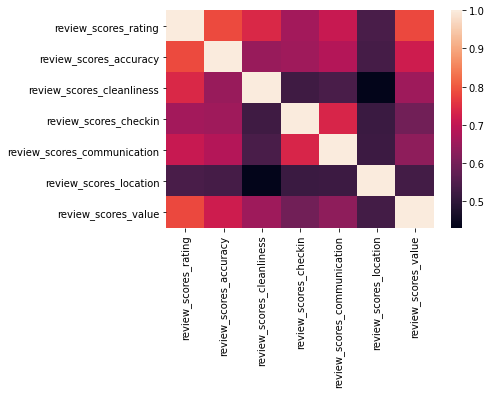

In [46]:
sns.heatmap((listings[review_rate]).corr())

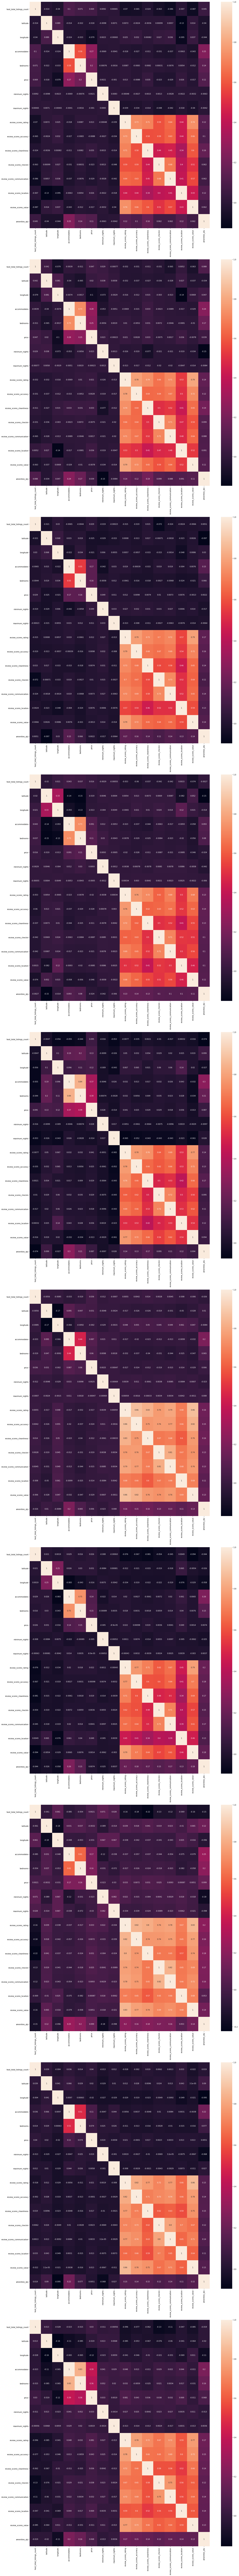

In [47]:
fig , axs = plt.subplots(len(cities), figsize = (20, 200) , sharex=False , tight_layout = True)
for n in range(0,len(cities),1):
    sns.heatmap(listings[listings.city==cities[n]].corr() ,annot=True , ax=axs[n])